In [6]:
from fastai.collab import CollabDataLoaders as CollabDataBunch , collab_learner
import pandas as pd


In [ ]:
cols = ['User ID','Movie ID','Rating','Timestamp']
ratings_df = pd.read_csv('/Users/swapneelpremchand/Downloads/ml-latest-small/ratings.csv',
                         header=None, names=cols )
ratings_df.head(5)



,User ID,Movie ID,Rating,Timestamp
0,userId,movieId,rating,timestamp
1,1,1,4.0,964982703
2,1,3,4.0,964981247
3,1,6,4.0,964982224
4,1,47,5.0,964983815


In [ ]:


ratings_df['User ID'] = pd.to_numeric(ratings_df['User ID'])
ratings_df['Movie ID'] = pd.to_numeric(ratings_df['Movie ID'])
ratings_df['Rating'] = pd.to_numeric(ratings_df['Rating'])
ratings_df['Timestamp'] = pd.to_numeric(ratings_df['Timestamp'])

ratings_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 1 to 100836
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User ID    100836 non-null  int64  
 1   Movie ID   100836 non-null  int64  
 2   Rating     100836 non-null  float64
 3   Timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 1 to 100836
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User ID    100836 non-null  int64  
 1   Movie ID   100836 non-null  int64  
 2   Rating     100836 non-null  float64
 3   Timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
data = CollabDataBunch.from_df(ratings_df, valid_pct=0.1)
data.show_batch()

,User ID,Movie ID,Rating
0,318,4447,3.0
1,563,56949,3.0
2,89,61323,2.5
3,274,750,4.0
4,187,235,4.5
5,232,595,3.0
6,148,1197,3.0
7,414,2012,3.0
8,288,1016,3.5
9,599,2858,5.0


In [17]:
learn = collab_learner(data, n_factors=40, y_range=[0,5.5], wd=.1)

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

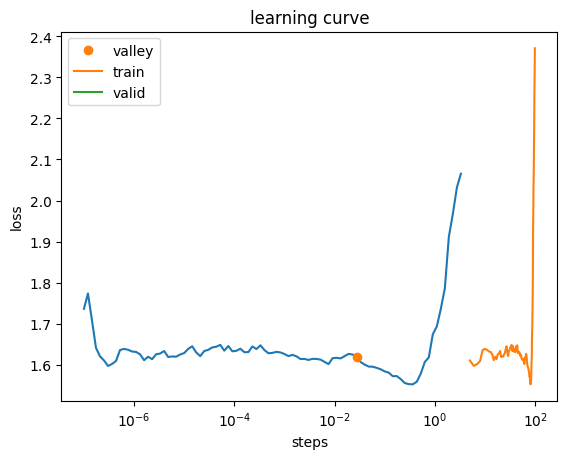

In [21]:
learn.lr_find()
learn.recorder.plot_loss()

In [22]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,time
0,0.706665,0.803561,00:06
1,0.505154,0.787813,00:04
2,0.406311,0.757777,00:05
3,0.335544,0.737585,00:05
4,0.279197,0.730902,00:04
